In [4]:
import os, shutil, glob
os.getcwd()

import pandas as pd 
import numpy as np

import re, math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#from mpl_toolkits.mplot3d import Axes3D
import matplotlib  as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")

from itertools import cycle
import datetime
import gc

#matplotlib inline

## Christa's Notes

%matplotlib inline
It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object). 
A simple Matplotlib tutorial is found here https://www.data-blogger.com/2017/11/15/python-matplotlib-pyplot-a-perfect-combination/.

### Libraries
* pandas & nympy are for matrices 
* matplotlib (+mpl_toolkits) & seaborn are for plotting
* re is for regression analysis, math for mathematical analysis
* gc is for garbage collector. 
* shutil module offers a number of high-level operations on files and collections of files
* glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
* itertools module implements a number of iterator building blocks inspired by constructs from APL
* sklearn is a machine learning module 


In [2]:
figformat =  'png'
dpi=300

## Setting the input

In [3]:
BaseDir = '/cpp_work/results/'
sorted(os.listdir(BaseDir));

### Run this cell if there is only one input folder

InputFolders = ['col-Plate1-HT29-e01-L01-48h-FA-v1']

### Alternatively, run this cell if there are several folders

InputFolders = []
NameContains = input('Enter part of name(s) of the folders: ') #  e.g.:  .*Plate1-HT29.*
for f in (f for f in os.listdir(BaseDir) if re.match(NameContains, f)):
    InputFolders.append(f)
print ('InputFolders: ' + str(InputFolders))

### Alternatively, run this cell if there are several folders (2)

In [4]:
InputFolders = ['col-Plate1-HCT116-e01-L01-48h-FA-v1-run2','col-Plate2-HCT15-e01-L01-48h-FA-v1-run2','col-Plate2-SW620-e01-L01-48h-FA-v1', 'col-Plate1-HT29-e01-L01-48h-FA-v1']
print ('InputFolders: ' + str(InputFolders))

InputFolders: ['col-Plate1-HCT116-e01-L01-48h-FA-v1-run2', 'col-Plate2-HCT15-e01-L01-48h-FA-v1-run2', 'col-Plate2-SW620-e01-L01-48h-FA-v1', 'col-Plate1-HT29-e01-L01-48h-FA-v1']


In [5]:
# OutputDir = input("Enter name for output folder: ") # e.g.: Plots
OutputDir = "QuickView";
if not os.path.exists(OutputDir): 
    os.makedirs(OutputDir)

## Gather the data

In [6]:
DataFrameDictionary = {}
ObjectList = ['featICF_cells', 'featICF_cytoplasm'] # For most projects, there is also 'featICF_nuclei_filtered' 
for obj in ObjectList:
    DataFrameDictionary[obj] = pd.DataFrame()
    ReadingFile = 0
    for InpF in InputFolders:
        DataFromFolder =  pd.DataFrame()
        Feature_files = glob.glob(BaseDir + '/*' + InpF + '*/*/*/' + obj + '.csv', recursive=True)
        for file in Feature_files[-1:]:
            print(file)
            DataFromOneFile =  pd.read_csv(file, sep=",", low_memory=False)
            print(DataFromOneFile.shape)
            ReadingFile += 1    
            DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)
            print(DataFromFolder.shape)
            
        DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)
    DataFrameDictionary[obj].columns = [str(col) + '_' + re.sub('_.*', '', re.sub('featICF_', '', obj)) for col in DataFrameDictionary[obj]]
    #DataFrameDictionary[obj].columns = [str(col) + '_' + re.sub('_.*', '', obj) for col in DataFrameDictionary[obj]]
    #DataFrameDictionary[obj].reset_index(inplace=True, insert=False)
    print('Found %s files' %(ReadingFile))
    print ('Dataframe contains {} columns and {} rows.'.format(DataFrameDictionary[obj].shape[1],
                                                          DataFrameDictionary[obj].shape[0]))

/cpp_work/results/col-Plate1-HCT116-e01-L01-48h-FA-v1-run2/1357/942/featICF_cells.csv
(163835, 734)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(163835, 734)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


/cpp_work/results/col-Plate2-HCT15-e01-L01-48h-FA-v1-run2/1390/955/featICF_cells.csv
(94294, 734)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(94294, 734)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


/cpp_work/results/col-Plate2-SW620-e01-L01-48h-FA-v1/1389/956/featICF_cells.csv
(198088, 734)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(198088, 734)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


/cpp_work/results/col-Plate1-HT29-e01-L01-48h-FA-v1/1355/941/featICF_cells.csv
(136131, 734)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(136131, 734)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


Found 4 files
Dataframe contains 734 columns and 592348 rows.
/cpp_work/results/col-Plate1-HCT116-e01-L01-48h-FA-v1-run2/1357/942/featICF_cytoplasm.csv
(163835, 725)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(163835, 725)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


/cpp_work/results/col-Plate2-HCT15-e01-L01-48h-FA-v1-run2/1390/955/featICF_cytoplasm.csv
(94294, 725)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(94294, 725)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


/cpp_work/results/col-Plate2-SW620-e01-L01-48h-FA-v1/1389/956/featICF_cytoplasm.csv
(198088, 725)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(198088, 725)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


/cpp_work/results/col-Plate1-HT29-e01-L01-48h-FA-v1/1355/941/featICF_cytoplasm.csv
(136131, 725)


<ipython-input-6-87615c46f6aa>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True)


(136131, 725)


<ipython-input-6-87615c46f6aa>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameDictionary[obj] = DataFrameDictionary[obj].append(DataFromFolder.iloc[:,:], ignore_index=True)


Found 4 files
Dataframe contains 725 columns and 592348 rows.


#### Christa's Notes
* This code seems to look for objects, featICF_cells & featICF_cytoplasm.
* For a given plate, don't I have more than one results file, and hence more than one featICF_cells, featICF_cytoplasma. 
-> It seems to be taking the mose recent file.


* glob functions allow for searching for files recursively using wildcards.
https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/



* Can we make this faster? Is the entire file loaded at once? 


In [7]:
Dataset = DataFrameDictionary[ObjectList[0]]
print(Dataset.shape)
for i in range(len(ObjectList)-1):
    Dataset = Dataset.merge(DataFrameDictionary[ObjectList[i+1]], left_index=True, right_index=True)
    print(Dataset.shape)

(592348, 734)
(592348, 1459)


In [8]:
Dataset.tail(1)

,ImageNumber_cells,ObjectNumber_cells,Metadata_Barcode_cells,Metadata_Site_cells,Metadata_Well_cells,FileName_CONC_cells,FileName_HOECHST_cells,FileName_ICF_CONC_cells,FileName_ICF_HOECHST_cells,FileName_ICF_MITO_cells,...,RadialDistribution_ZernikePhase_illumSYTO_8_0_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
592347,1,39,col-Plate1-HT29-e01-L01-48h-FA-v1,4,D06,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w5D52...,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w1E74...,ICF_CONC.npy,ICF_HOECHST.npy,ICF_MITO.npy,...,-1.570796,1.998096,-1.100674,2.988613,1.20028,-1.952334,2.47964,-2.32374,1.154526,-1.005361


In [9]:
Dataset['Row'] = Dataset['Metadata_Well_cells'].astype(str).str[0]
Dataset['Column'] = Dataset['Metadata_Well_cells'].astype(str).str[1:]


In [10]:
Dataset = Dataset.loc[:, (Dataset != Dataset.iloc[0]).any()] # Remove invariant columns
print ('Dataframe contains {} columns and {} rows.'.format( Dataset.shape[1],
                                                          Dataset.shape[0]))

Dataframe contains 1423 columns and 592348 rows.


In [11]:
Layout =  pd.read_csv('metadata_new.csv', sep = ',', index_col=None)
Layout.tail(1)

,plateID,well,cmpdname,CONCuM,cmpdnum
279,plate_1,O23,DMSO,0.1,DMSO_ 0.1


In [12]:
df = Dataset.merge(Layout, left_on = ['Metadata_Well_cells'], 
             right_on = ['well'], how='left')
df.tail(1)

,ObjectNumber_cells,Metadata_Barcode_cells,Metadata_Site_cells,Metadata_Well_cells,FileName_CONC_cells,FileName_HOECHST_cells,FileName_MITO_cells,FileName_PHAandWGA_cells,FileName_SYTO_cells,PathName_CONC_cells,...,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Row,Column,plateID,well,cmpdname,CONCuM,cmpdnum
592347,39,col-Plate1-HT29-e01-L01-48h-FA-v1,4,D06,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w5D52...,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w1E74...,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w2FA3...,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w38F6...,col-Plate1-HT29-e01-L01-48h-FA-v1_D06_s4_w4812...,/share/mikro/IMX/MDC_pharmbio/ColoPaint/col-Pl...,...,-2.32374,1.154526,-1.005361,D,06,plate_1,D06,DMSO,0.0,DMSO_0


In [13]:
df['ImageID'] =  df['Metadata_Barcode_cells'] +  ';' + df['Metadata_Well_cells'] + ';' + df['Metadata_Site_cells'].astype(str) + ';' + df['cmpdname']

In [14]:
CompoundNames = sorted(list(set(df['cmpdname'])))
print(CompoundNames)

['DMSO']


In [15]:
Concentrations  = list(sorted(set(df['CONCuM'])))
print(Concentrations)

[0.0, 0.0125, 0.025, 0.05, 0.075, 0.1, 0.125, 0.25, 0.5, 1.0, 5.0, 10.0]


In [16]:
Plates = sorted(list(set(df['Metadata_Barcode_cells'])))
NrOfPlates = len(Plates)
print('Number of plates: %s' %(NrOfPlates))
Wells = sorted(list(set(df['well'])))
NrOfWells = len(Wells)
print('Number of wells: %s' %(NrOfWells))
Rows = sorted(list(set([w[0] for w in Wells])))
print(*Rows)
NrOfRows = len(Rows)
Columns = sorted(list(set([w[1:] for w in Wells])))
NrOfColumns = len(Columns)
print(*Columns)

Number of plates: 4
Number of wells: 280
B C D E F G H I J K L M N O
02 03 04 05 06 07 08 09 10 11 14 15 16 17 18 19 20 21 22 23


In [17]:
#df['well']
#[w[1:] for w in Wells]

## Select some features for heatmaps and boxplots

FeaturesToPlot = ['AreaShape_Area_cells','AreaShape_Area_cytoplasm',
                  'Intensity_MeanIntensity_illumCONC_cells',
                  'Intensity_MeanIntensity_illumCONC_cytoplasm',
                  'Intensity_MeanIntensity_illumMITO_cells',
                  'Intensity_MeanIntensity_illumMITO_cytoplasm',
                  'ObjectNumber_cells', 'ObjectNumber_cytoplasm']

In [18]:
FeaturesToPlot = ['ObjectNumber_cells', 'ObjectNumber_cytoplasm']


## Heatmaps

In [19]:
Co, Ro = 2, math.ceil(len(FeaturesToPlot )/2)  # 2 columns
HeatmapSize = 6, 1.1*len(FeaturesToPlot)
wspace = 0.4
hspace = 0.4
top = 0.9
cmap='Reds' # Select color map, e.g. 'Reds', 'RdBu_r'


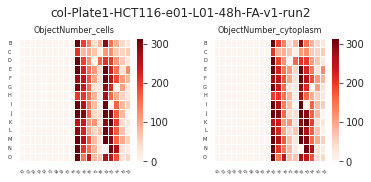

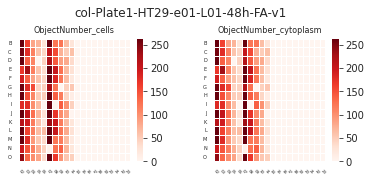

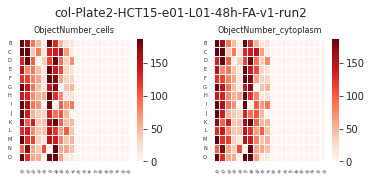

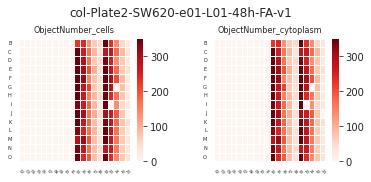

In [20]:
for OnePlate in Plates:
    dfPart= df[df['Metadata_Barcode_cells'] == OnePlate]
    fig = plt.figure(figsize = HeatmapSize)
    fig.suptitle('{}'.format(OnePlate)  , fontsize = 12, y=1.1)
    n = 1
    for feature in FeaturesToPlot[:]:
        HeatmapFor = feature
        OneFeature = dfPart[[HeatmapFor, 'Metadata_Well_cells']]
        dictOfnumeric = {HeatmapFor : np.median} # or np.median
        groupedby = OneFeature.groupby('Metadata_Well_cells').agg(dictOfnumeric)
        groupedby

        for W in Wells:
            if W not in groupedby.index:
                groupedby.loc[W] = 0
        groupedby.sort_index(inplace=True)

        groupedbyvalues = groupedby[HeatmapFor].values.copy()
        groupedbyvalues.resize(NrOfRows,int(NrOfColumns))
        groupedbydf = pd.DataFrame(groupedbyvalues)
        groupedbydf.columns = Columns
        groupedbydf.index = Rows
        
        vmed = math.ceil(groupedby[HeatmapFor].quantile(0.5)*1000)/1000
        v05 = math.ceil(groupedby[HeatmapFor].quantile(0.05)*1000)/1000
        v95 = math.ceil(groupedby[HeatmapFor].quantile(0.95)*1000)/1000
        vmin = 0 #math.floor(groupedby[HeatmapFor].quantile(0.05)*1000)/1000

        ax = fig.add_subplot(Ro, Co , n)
        ax = sns.heatmap(groupedbydf, cmap=cmap,
                                     vmin = vmin,
                                     #vmax = vmed * 3,
                                     vmax = v95, # when taking in more plates, the vmed*3 didn't work for my plates anymore... 
                                     square = False,
                                     linewidths = .5,
                                     xticklabels = 1, yticklabels = groupedbydf.index,
                                     #cbar_kws = {'ticks': [v05, vmed, v95]}
                                     )
        plt.yticks(fontsize=5,rotation=0)
        plt.xticks(fontsize=4,rotation= -45) 

        ax.set_title(HeatmapFor, fontsize = 8, loc = 'center')
        plt.subplots_adjust(  wspace = wspace, hspace = hspace, top = top)
        n += 1

    fig.savefig('{}/Heatmaps_{}_cmap_{}.{}'.format(OutputDir, OnePlate, cmap, figformat),  dpi=dpi, bbox_inches='tight')
    
    

### Select numeric columns and calculate mean (or median) per image

In [21]:
numeric_columns = list()
for a in df.columns:
    if (df.dtypes[a] == 'float64') | (df.dtypes[a] == 'int64'):
        numeric_columns.append(a)
print('Found {} numeric columns'.format(len(numeric_columns)))

DatasetNumeric = df[numeric_columns]
DatasetNumericAndLabels = df[['ImageID'] + DatasetNumeric.columns.tolist()]

dictOfnumeric = { i : np.nanmean for i in DatasetNumericAndLabels.columns[1:].tolist()}
groupedbyImage = DatasetNumericAndLabels.groupby('ImageID').agg(dictOfnumeric)

groupedbyImage_var = groupedbyImage.loc[:, groupedbyImage.std() > 0.001].copy() #remove invariant features and features with std below some cut-off

print('Excluded features with SD < 0.001 and SD > 10000: {}'.format(groupedbyImage_var.shape[1]))

groupedbyImage_var.dropna(axis=1, inplace=True)
print('Removed features with missing values: {}'.format(groupedbyImage_var.shape[1]))
varying_features = list(groupedbyImage_var.columns)

groupedbyImage_var.reset_index(inplace=True)
groupedbyImage_var[['plate', 'well', 'site', 'compound']] = groupedbyImage_var['ImageID'].str.split(';', expand=True)

#groupedbyImage['compound'] = groupedbyImage['ImageID'].str.split(';')[2]
#groupedbyImage['plate'] = groupedbyImage['ImageID'].str.split(';')[0]
groupedbyImage_var['CONCuM'] = np.round(groupedbyImage_var['CONCuM'], 5)

Found 1388 numeric columns
Excluded features with SD < 0.001 and SD > 10000: 1217
Removed features with missing values: 1214


In [22]:
groupedbyImage_var.head(1)

,ImageID,ObjectNumber_cells,Metadata_Site_cells,AreaShape_Area_cells,AreaShape_BoundingBoxArea_cells,AreaShape_BoundingBoxMaximum_X_cells,AreaShape_BoundingBoxMaximum_Y_cells,AreaShape_BoundingBoxMinimum_X_cells,AreaShape_BoundingBoxMinimum_Y_cells,AreaShape_Center_X_cells,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,CONCuM,plate,well,site,compound
0,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2;B14;1...,541.5,1.0,2401.016636,3664.550832,1020.260628,923.151571,959.236599,863.813309,989.215855,...,0.044119,0.11064,-0.006813,0.008495,0.005123,0.0125,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2,B14,1,DMSO


#### Boxplots for compounds/doses

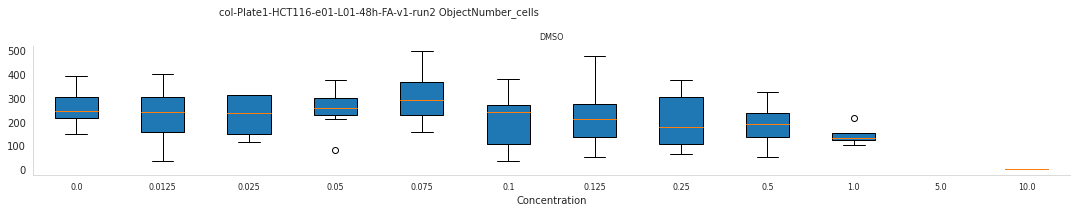

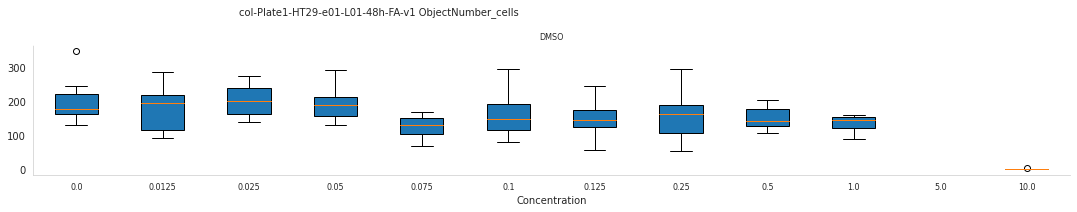

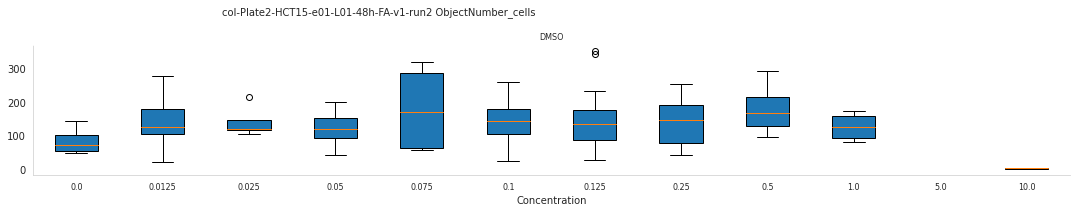

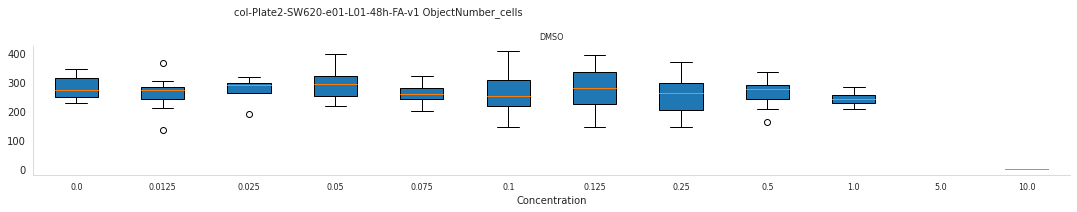

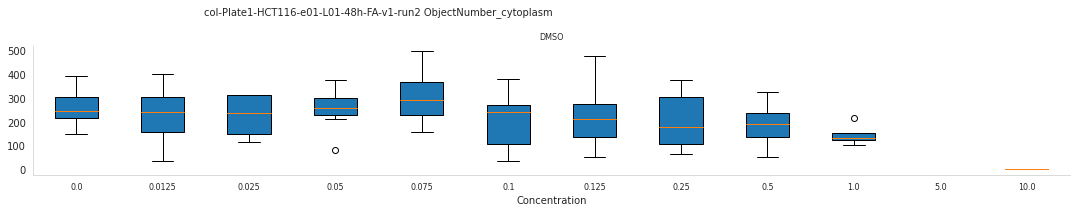

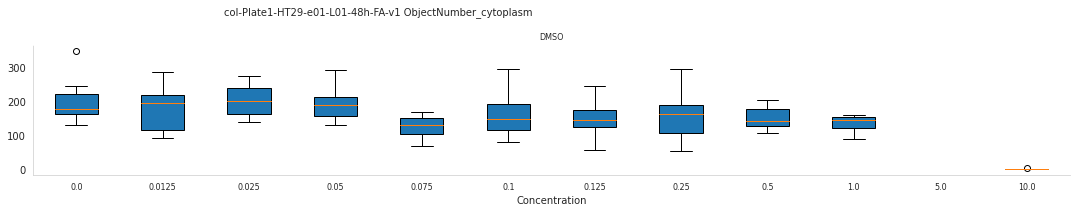

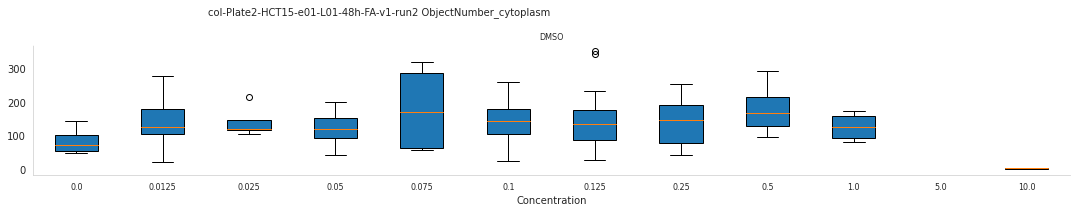

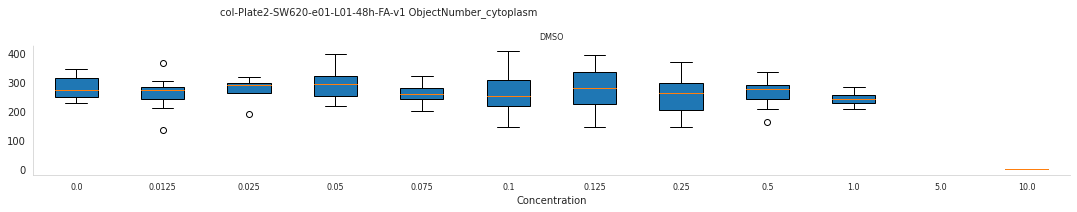

In [23]:
for SomeFeature in FeaturesToPlot:
    for oneplate in Plates:
        dfoneplate = groupedbyImage_var.loc[(groupedbyImage_var['plate'] == oneplate)][['compound','CONCuM', 'well', SomeFeature]]
        Wells = (dfoneplate['well']);
        #dfoneplate = dfoneplate.loc[[w[1:] in ('02','07','19','14') for w in Wells]]; # Only take the values of a certain column
        dfoneplate = dfoneplate.loc[[w[1:] in ('03','08','20','15') for w in Wells]]; # Only take the values of a certain column
        v99 = math.ceil(dfoneplate[SomeFeature].quantile(0.99)*1000)/1000


        fig = plt.figure(figsize = (16,3))
        fig.suptitle('{} {}'.format(oneplate, SomeFeature), fontsize = 10, x=0.3)
        sp = 1
        for compound in CompoundNames[:]:
            ax = fig.add_subplot(1,len(CompoundNames),sp) 
            dfonecompound = dfoneplate.loc[(dfoneplate['compound'] == compound)][[SomeFeature, 'CONCuM']]
            mylist = []
            for conc in Concentrations:
                mylist.append(dfonecompound.loc[(dfonecompound['CONCuM'] == conc)][SomeFeature].values)
            ax.set_title(compound, fontsize = 8, loc = 'center')
            bplot = ax.boxplot(mylist, patch_artist=True, labels = Concentrations)
            ax.set(xlabel='Concentration')
            #ax.set_ylim([0, v99])
            ax.set_facecolor('w')
            ax.spines['bottom'].set_color('lightgrey')
            ax.spines['top'].set_color('w')
            ax.spines['left'].set_color('lightgrey')
            ax.spines['right'].set_color('w')
            ax.tick_params(axis='x', labelsize=8)
            plt.subplots_adjust(left = 0, top=0.80,  wspace=0.2, bottom=0.2)  
            sp = sp + 1

        fig.savefig('{}/{}_{}.{}'.format(OutputDir, oneplate, SomeFeature, figformat),  dpi=dpi, bbox_inches='tight')


string1 in (substr1, substr2, substr3) 

is a common way to check if a string is part of another string. 



### PCA 

In [24]:
x = groupedbyImage_var.iloc[:, 3:-4].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [25]:
ImagePrincipalDf = pd.DataFrame(data = principalComponents)
ImagePrincipalDf.rename(columns={0: 'principal component 1', 1: 'principal component 2', 2: 'principal component 3'}, inplace=True)
ImagePrincipalDf['CONCuM'] = groupedbyImage_var['CONCuM']
ImagePrincipalDf['compound'] = groupedbyImage_var['compound']
ImagePrincipalDf['plate'] = groupedbyImage_var['plate']
ImagePrincipalDf['Dose_string'] = groupedbyImage_var['CONCuM'].astype(str)

In [26]:
ImagePrincipalDf.head()

,principal component 1,principal component 2,principal component 3,CONCuM,compound,plate,Dose_string
0,-14.120602,5.254454,-12.474047,0.0125,DMSO,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2,0.0125
1,-19.023553,11.466830,-1.837360,0.0125,DMSO,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2,0.0125
2,-16.522430,9.627026,-4.769617,0.0125,DMSO,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2,0.0125
3,-14.738106,6.727331,-12.323086,0.0125,DMSO,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2,0.0125
4,-9.902453,7.844250,-2.071547,0.5000,DMSO,col-Plate1-HCT116-e01-L01-48h-FA-v1-run2,0.5


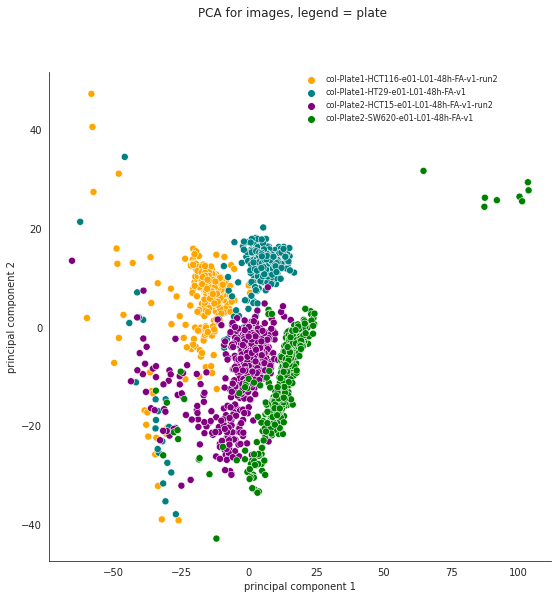

In [27]:
hue='plate'

pal=['orange', 'teal', 'purple', 'green']

fig = plt.figure(figsize = (9,9))
fig.suptitle('PCA for images, legend = {}'.format(hue), fontsize = 12)
ax = fig.add_subplot(111)

ax =sns.scatterplot(x='principal component 1', y='principal component 2',
              hue=hue, data=ImagePrincipalDf, palette=pal,  s=50, alpha = 1, marker = 'o');

ax.legend(bbox_to_anchor = (0.9, 1),borderaxespad = 0, fontsize = 8, frameon = False)
#ax.set_xlim([-50, 100])
#ax.set_ylim([-40, 60])
# ax.get_legend().remove()
sns.despine()
fig.savefig('{}/PC1_PC2_{}.{}'.format(OutputDir, hue, figformat),  dpi=dpi)

In [118]:
## Filter the dataFrame 


PrincipalToPlot = ImagePrincipalDf

NewDF = PrincipalToPlot[(PrincipalToPlot['CONCuM'] < 0.3)]
print(NewDF.shape)


(1849, 7)


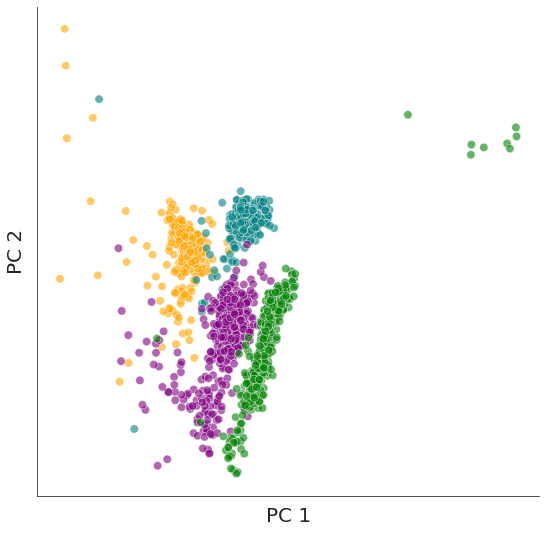

In [119]:
## For image

hue='plate'

pal=['orange', 'teal', 'purple', 'green']

fig = plt.figure(figsize = (9,9))
#fig.suptitle('PCA for images, legend = {}'.format(hue), fontsize = 12)
ax = fig.add_subplot(111)

ax =sns.scatterplot(x='principal component 1', y='principal component 2',
              hue=hue, data=NewDF, palette=pal,  s=70, alpha = 0.6, marker = 'o');

#ax.legend(bbox_to_anchor = (0.9, 1),borderaxespad = 0, fontsize = 8, frameon = False)
#ax.set_xlim([-50, 100])
#ax.set_ylim([-40, 60])
ax.get_legend().remove()
ax.set_yticklabels([]); ax.set_xticklabels([])
plt.xlabel('PC 1', fontsize=20); plt.ylabel('PC 2', fontsize=20)
sns.despine()
fig.savefig('{}/PC1_PC2_ForFigure_{}.{}'.format(OutputDir, hue, 'png'),  dpi=dpi)

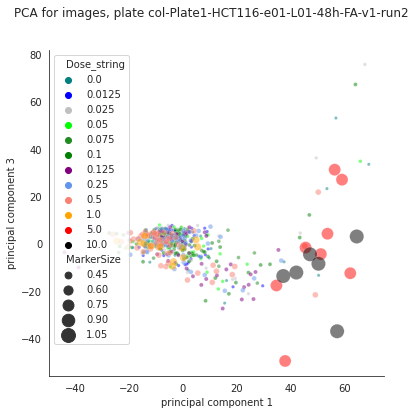

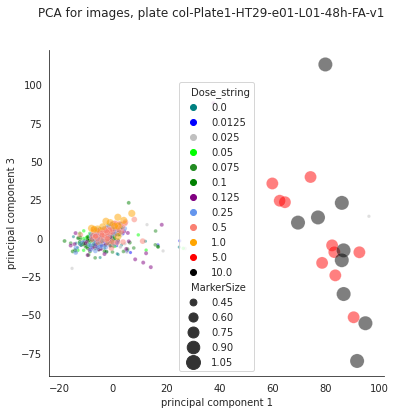

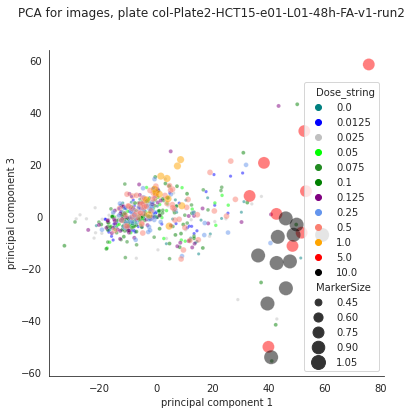

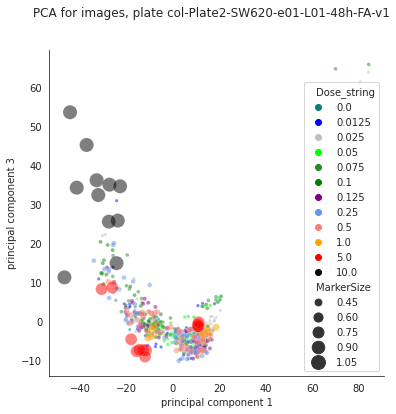

In [103]:
for p in Plates:
    DfOnePlate =  groupedbyImage_var[groupedbyImage_var['plate'] == p]
    DfOnePlate.reset_index(inplace=True, drop=True)
    x = DfOnePlate.iloc[:, 3:-4].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)

    ImagePrincipalDf = pd.DataFrame(data = principalComponents)
    ImagePrincipalDf.rename(columns={0: 'principal component 1', 1: 'principal component 2', 2: 'principal component 3'}, inplace=True)
    ImagePrincipalDf['CONCuM'] = DfOnePlate['CONCuM']
    ImagePrincipalDf['compound'] = DfOnePlate['compound']
    ImagePrincipalDf['plate'] = DfOnePlate['plate']
    ImagePrincipalDf['Dose_string'] = DfOnePlate['CONCuM'].astype(str)
    ImagePrincipalDf['MarkerSize'] = np.where(ImagePrincipalDf['CONCuM'] < 20, np.log10(ImagePrincipalDf['CONCuM'] + 2), 0.3)
    ImagePrincipalDf['well'] = DfOnePlate['well']
    ImagePrincipalDf['site'] = DfOnePlate['site']
    ImagePrincipalDf.sort_values(by='CONCuM', inplace=True)
    

    pal=cycle(['teal', 'blue', 'silver', 'lime',
                      'forestgreen', 'green', 'purple', 'cornflowerblue', 'salmon', 'orange', 'red', 'black'])
    #pal=cycle(['teal', 'red', 'black'])
    fig = plt.figure(figsize = (6,6))
    fig.suptitle('PCA for images, plate {}'.format(p), fontsize = 12)
    #ax = fig.add_subplot(111)

    ax =sns.scatterplot(x='principal component 1', y='principal component 3',
                  hue='Dose_string', data=ImagePrincipalDf, palette=pal,  size='MarkerSize', sizes=(10, 200), 
                        alpha = 0.5, marker = 'o', label = None);
        

    
    #ax.legend(bbox_to_anchor = (0.9, 1),borderaxespad = 0, fontsize = 8, frameon = False, loc = 'best')
    
    #ax.legend(borderaxespad = 0, fontsize = 8, frameon = False, loc = 'best')
    #ax.set_xlim([-50, 100])
    #ax.set_ylim([-40, 60])
    # ax.get_legend().remove()
    sns.despine()
    fig.savefig('{}/PC1_PC2_{}_{}.{}'.format(OutputDir, p, hue, figformat),  dpi=dpi)

In [36]:
ImagePrincipalDf.sort_values(by='principal component 1', ascending=False, inplace=True)
ImagePrincipalDf.head(10)

,principal component 1,principal component 2,principal component 3,CONCuM,compound,plate,Dose_string,MarkerSize,well,site
440,84.364541,-27.815478,65.947640,0.075,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.075,0.317018,M14,2
480,84.216169,-24.488278,64.045055,0.025,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.025,0.306425,N14,2
481,80.714924,-22.695827,61.463771,0.025,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.025,0.306425,N14,3
482,80.047948,-27.247949,60.855037,0.025,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.025,0.306425,N14,4
479,74.688850,-30.080382,57.010491,0.025,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.025,0.306425,N14,1
439,72.217489,-26.121425,56.926536,0.075,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.075,0.317018,M14,1
442,70.524380,-29.074763,54.929860,0.075,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.075,0.317018,M14,4
441,70.047439,-36.116795,64.823235,0.075,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.075,0.317018,M14,3
465,20.752347,4.914488,6.381428,0.100,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.1,0.322219,M20,3
459,20.420553,5.616897,2.704409,0.025,DMSO,col-Plate2-SW620-e01-L01-48h-FA-v1,0.025,0.306425,M19,1


## Another way of adding a legend    
    
    concentrations = pd.unique(ImagePrincipalDf['Dose_string'])
    markersizes = pd.unique(ImagePrincipalDf['MarkerSize'])
    
    for m in range(len(markersizes)):
        plt.scatter([], [], c='k', alpha=0.3, s=markersizes[m], label=concentrations[m] + ' %')